<a href="https://colab.research.google.com/github/aypy01/tensorflow/blob/main/module-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module-3

##  Convolutional Neural Networks (CNN) – Complete Explanation


###  CNN Architecture Concepts

#### 1.  Input Dimensions

- Shape: **Height × Width × Channels**
- Channels:
  - RGB image → 3 channels
  - Grayscale → 1 channel
- Pixel range: **0 to 255** (usually normalized to 0–1)



#### 2.  Filters (Kernels)

- Learnable matrices: e.g., `3x3`, `5x5`
- Slides over image to extract features like:
  - Edges
  - Textures
  - Patterns
- Each filter outputs a **Feature Map**



#### 3.  Convolution Operation

- Filter **slides** across input
- At each step:
  - Performs **dot product** between filter and image patch
  - Result is stored in **feature map**
- Deeper layers = more abstract features



#### 4.  Stride

- How many pixels the filter moves at a time:
  - `stride = 1`: moves one pixel → high-resolution output
  - `stride = 2`: skips pixels → faster but lower-res



#### 5.  Padding

- Adds borders to input so the filter can cover the edges
- Types:
  - `valid` → no padding (output shrinks)
  - `same` → zero-padding to keep size same as input



#### 6.  Pooling (Downsampling)

- Reduces dimensionality
- Helps generalization and speed
- Common types:
  - **Max Pooling**: keeps max value in patch
  - **Average Pooling**: takes average
- Example: `2x2 Max Pooling` halves H and W




## CNN Representation
### CNN Architecture Visual Diagram

Below is a basic representation of how a Convolutional Neural Network processes an image input:

```text
┌────────────────────┐
│  Input Image       │   ← [32 x 32 x 3] (H x W x Channels)
└────────────────────┘
           │
           ▼
┌────────────────────┐
│ Convolution Layer  │   ← Apply multiple filters (e.g., 3x3)
│ (Conv2D)           │   → Feature maps: edges, textures
└────────────────────┘
           │
           ▼
┌────────────────────┐
│ Activation (ReLU)  │   ← ReLU introduces non-linearity
└────────────────────┘
           │
           ▼
┌────────────────────┐
│ Pooling Layer      │   ← MaxPooling2D (e.g., 2x2)
│ (Downsampling)     │   → Reduces spatial size
└────────────────────┘
           │
           ▼
┌────────────────────┐
│ More Conv + Pool   │   ← Stack deeper layers to learn
│ (Optional)         │      complex patterns
└────────────────────┘
           │
           ▼
┌────────────────────┐
│ Flatten Layer       │  ← Converts 4D feature maps into 1D
└────────────────────┘
           │
           ▼
┌────────────────────┐
│ Fully Connected     │  ← Dense layer
│ (Dense Layer)       │
└────────────────────┘
           │
           ▼
┌────────────────────┐
│ Output Layer        │  ← e.g., 10 classes → Dense(10, softmax)
└────────────────────┘


Essential Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets



##Dataset CIFAR10
CIFAR dataset = 60000 samples , 10 Labels, 6000 per labels
labels= Airplane,Automobile,Bird,Car,Deer,Dog,Frog,Horse,Ship,Truck

###Spliting /Loading and other preprocessing

In [ ]:
#To see the labels exist in target/labels
import tensorflow_datasets as tfds

ds, info = tfds.load("cifar10", with_info=True)
print(info.features["label"].names)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
#From above after chacking the labels makin it manual header
#P.S this class names are not necessary for program while only for representation
class_name=['airplane','automobile','bird','cat','deer',
            'dog','frog','horse','ship','truck'] #10 labels which gonna be used in ploting the data

#from datset of tensorflow
#its in tuple coz its tensorflow dataset, every KERAS library dataset returns in tuple just like this format
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train.shape #X tarin hae 50000 images each have 32x32 pixel image and color

(50000, 32, 32, 3)

In [ ]:
y_train.shape #Y tain are labels between 0-9 (10)in 1 column so 1
#Each label is a number between 0 and 9 (CIFAR-10 has 10 classes: airplane, car, bird, cat, deer, dog, frog, horse, ship, truck).

(50000, 1)

###Normalization

In [ ]:
#This is the standard preprocessing step for image datasets in TensorFlow/Keras.
# Normalization = process of scaling features to a fixed range (0–1 or -1–1)
# Here: we are doing Min-Max Normalization → divide by 255 (max pixel value)
# Result: all pixel values fall in [0,1]

x_train, x_test = x_train / 255.0, x_test / 255.0

#Converted 0-255 range to float 0-1

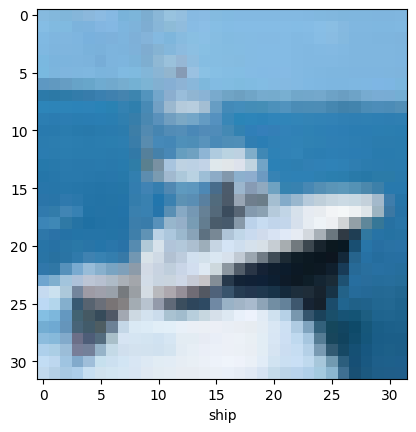

In [ ]:
#Let's see the image example

plt.imshow(x_train[8]) #This will show the input of train index 7
#To see the labels we should 1st faltten the y_train in 1-D
y_train = y_train.flatten() # If you flatten y_train, its shape goes from (50000 x 1) → (50000,).That just makes label indexing easier.
plt.xlabel(class_name[y_train[8]]) #this will show the label in the image associated with respective index
plt.show()
#As result image 8 = somwhat a ship

##CNN Architecture
the architecture is simple:
1st stack of Convolution process(Filter ) and then Pooling method(extracting the features from images) and these are Flattend and the fed to CNN to determine which class it fall s under

###Model

In [ ]:
#My way if not works be changed from source
from tensorflow.keras import layers, models


model = models.Sequential([
    #Making the matrix of 32 and then selecting 3x3 filter image matrix of 32x32x3(3=RGB)
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), activation='relu'),
    #Now the Pooling ;here max pooling we took
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),



    #Now flattening the data , this has to be before staring the dense layer
    layers.Flatten(), #From 4d-to 3-d
    #The traiditinal neural network starts here
    #Adding the Dense layer to classify the images in the labels
    layers.Dense(64,activation='relu'),


    #Output
    layers.Dense(10,activation='softmax') #as the ere is 10 Labels



])
model.summary() # what its telling and how to read???

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,698 (494.91 KB)

 Trainable params: 126,698 (494.91 KB)

 Non-trainable params: 0 (0.00 B)

###Compile

#### Loss Function Cheat Sheet

#### 1. BinaryCrossentropy
- Use for binary classification (2 classes).
- Labels: `0` or `1`.
- Example: Cat vs Dog.

#### 2. CategoricalCrossentropy
- Use for multi-class classification (>2 classes).
- Labels: one-hot encoded (e.g., `[0,0,1,0,...]`).
- Example: Class 3 → `[0,0,1,0,...]`.

#### 3. SparseCategoricalCrossentropy
- Use for multi-class classification (>2 classes).
- Labels: integers (e.g., `0,1,2,...`).
- Example: Class 3 → `3`.
- Recommended for datasets like CIFAR-10.


In [ ]:
from tensorflow.keras import losses

model.compile(optimizer='adam', #Optimizer
              loss='sparse_categorical_crossentropy', #Loss
              metrics=['accuracy'])

###Fitting/Training

In [ ]:

model.fit(x_train,y_train, epochs=8, batch_size=32, validation_data=(x_test,y_test),verbose=1)

#Rule of Thimb use validatin _data(), instead of validation_split in cnn


Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3485 - loss: 1.7651 - val_accuracy: 0.5398 - val_loss: 1.2533
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5752 - loss: 1.1890 - val_accuracy: 0.6212 - val_loss: 1.0709
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6420 - loss: 1.0042 - val_accuracy: 0.6595 - val_loss: 0.9694
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6861 - loss: 0.8861 - val_accuracy: 0.6864 - val_loss: 0.8969
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7192 - loss: 0.8045 - val_accuracy: 0.7006 - val_loss: 0.8448
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7396 - loss: 0.7452 - val_accuracy: 0.7163 - val_loss: 0.8125
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7502 - loss: 0.6978 - val_accuracy: 0.7163 - val_loss: 0.8100
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7626 - loss: 0.6588 - val_a

###Evaluate

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f'the accuracy is:{accuracy:.04f}')

313/313 - 1s - 2ms/step - accuracy: 0.7245 - loss: 0.8101
the accuracy is:0.7245


###Save

In [ ]:
##Save
model.save("CIFAR10.keras")

###Summary

1. Loaded CIFAR-10 dataset (images + labels).

2. Normalized pixel values from 0–255 → 0–1 (converted to float).

3. Built CNN: stacked Conv2D + MaxPooling layers for feature extraction.

4. Applied Flatten to convert multi-dim features → 1D.

5. Added Dense layers + final Softmax output (10 classes).

6. Compiled with Adam optimizer + SparseCategoricalCrossentropy loss.

7. Trained with validation data (not split).

8. Achieved ~72% accuracy.

9. Saved as CIFAR10.keras.
---

##Image Augmentation
It s a technique used to artificially expand the size of a training dataset by creating modified versions of images.

These modifications can include:

Rotation,Width/height shift,Zoom in/out, Horizontal/vertical flip,Brightness/contrast adjustment, Shear/stretch/skew

This helps the model:

Learn features from different perspectives. Become robust to variations, Generalize better to unseen data

 In short: Instead of collecting 10,000 new images, you can teach your model to be smart by twisting and remixing your 1000 images in creative ways.



###Importing Essential Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets



In [ ]:
#from datset of tensorflow
#its in tuple coz its tensorflow dataset, every KERAS library dataset returns in tuple just like this format
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
#datatype of x_train before normalization
x_train.dtype

dtype('uint8')

###Normalization


In [ ]:
#Normalizinig
#changing the dtype to float64
x_train,x_test = x_train/255.0 ,x_test /255.0

In [ ]:
#datatype after Normalization
x_train.dtype
#dtype is changed from uint8 to float64


dtype('float64')

###Model

In [ ]:
#Model
from tensorflow.keras import layers,models

model= models.Sequential([
    layers.Conv2D(32,(3,3),input_shape=(32,32,3)),
    layers.Conv2D(64 ,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(16,(3,3),activation='relu'),


    layers.Flatten(),

    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),

    layers.Dense(10,activation='softmax')
])

###Compile

In [ ]:
#Compile

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

###Augmentation(Image Data Generator)


In [ ]:
#Importation for image augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Augmentation parameters
datagen=ImageDataGenerator(
    rotation_range=35,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    fill_mode='nearest'
)

###Fitting/Training

In [ ]:
#Model fit
model.fit(datagen.flow(x_train,y_train, batch_size=32,shuffle=True),
          epochs=10, validation_data=(x_test,y_test), verbose=1 )


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4994 - loss: 1.3929 - val_accuracy: 0.5533 - val_loss: 1.2545
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5135 - loss: 1.3525 - val_accuracy: 0.5605 - val_loss: 1.2176
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5180 - loss: 1.3344 - val_accuracy: 0.5660 - val_loss: 1.2377
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5308 - loss: 1.3072 - val_accuracy: 0.5487 - val_loss: 1.2957
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5338 - loss: 1.2974 - val_accuracy: 0.5775 - val_loss: 1.1750
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.5432 - loss: 1.2754 - val_accuracy: 0.5909 - val_loss: 1.1353
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5502 - loss: 1.2520 - val_accuracy: 0.5960 - val_loss: 1.1152
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5577 -

###Evaluate

In [ ]:
#Evaluate
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.6282 - loss: 1.0394


[1.0393589735031128, 0.6281999945640564]

###Save

In [ ]:
#Save
model.save("CIFAR_Augmented.keras")

###Summary

Used ImageDataGenerator with parameters like zoom, shift, rotation, and fill_mode="nearest".

1. Preprocessed CIFAR-10 the same way (normalization 0–255 → 0–1).

2. Model architecture was the same as standard CNN.

3. Training done with datagen.flow(x_train, y_train).

4. Achieved ~62% accuracy (lower due to added complexity).

5. Saved as CIFAR_Augmented.keras.

---
##Working with small datasets

###Pretrained dataset
CNNs trained on massive datasets (like ImageNet, which has over 1 million images across 1000+ classes) can be reused for transfer learning. Instead of training a CNN from scratch, we can:

Use the pretrained CNN as a feature extractor, and

Attach our own custom classifier (like a DNN) at the end for a specific task.

Think of it like this: the CNN already knows how to detect edges, textures, shapes — so why re-invent the wheel?

---

####Fine Tuning
Fine-tuning is the process of unfreezing some layers of the pretrained model and retraining them (usually the deeper ones) on your specific dataset.

Why?

Early layers in a CNN learn general features like edges, corners, textures. These are useful across all kinds of images.

Later layers learn task-specific features (like cat faces, dog paws, etc.). You might want to tweak these to match your dataset (like medical scans, satellite images, etc.).

So instead of retraining the entire model, we just fine-tune the final layers to improve performance without starting from zero.




###Using these pretrained models
We will seperate the Cats with dogs


In [ ]:
import tensorflow_datasets as tfds

#cats vs dogs are not like cifar or mnist so this approch to load dataset
#Spliting the datset into train and info coz thta what a cats_vs_dogs datset returns
#To see the labels exist in target/labels
import tensorflow_datasets as tfds

#the dataset have x_batches (having train and labels)
(x_train, x_val, x_test ), info = tfds.load("cats_vs_dogs", with_info=True,
    split=['train[:80%]','train[80%:90%]', 'train[90%:]', ],
    as_supervised=True,)
print(info.features["label"].names)


['cat', 'dog']


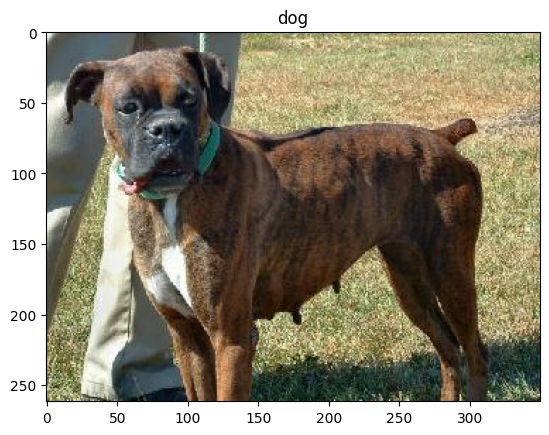

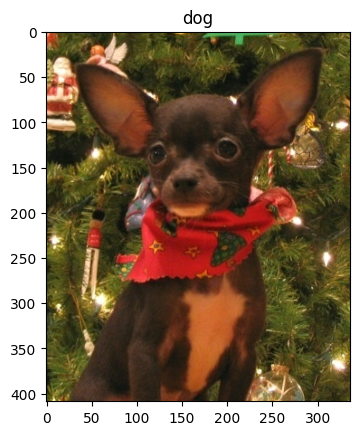

In [ ]:
import matplotlib.pyplot as plt

get_label_name = info.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in x_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

###Data Processing

In [ ]:
## As seen from above the size of the images are different
# We try to have an image size which can compress but not stretch,
# because stretching makes it harder for the model to recognize what image it is.
# For this dataset we will use image size = 160

import tensorflow as tf

def format(image, label):
    #Cast from uint8 (0–255) → float32 (0.0–255.0)
    #Without this, division by a float constant throws dtype mismatch errors.
    image = tf.cast(image, tf.float32)

    # Normalize to [-1, 1] because MobileNetV2 was pretrained on ImageNet with this scaling.
    # Equivalent to: (image / 127.5) - 1
    # Note: If we were training from scratch (no pretrained weights),
    #       we’d normally scale to [0, 1] using image/255.0 instead.
    image = (image / 127.5) - 1.0

    # Resize to 160x160
    # If original is smaller → upsample (interpolation adds artificial pixels).
    # If larger → downsample (some information is discarded).
    image = tf.image.resize(image, (160, 160))

    return image, label


In [ ]:
#applying the format from uint8 to float32 for each image in x_train ,x_val and x_test images
train = x_train.map(format)
validation = x_val.map(format)
test = x_test.map(format)

# Check dtypes before and after formatting
for image, label in x_train.take(1):   # raw dataset
    print("Raw x_train dtype and shape:", image.dtype,image.shape)
print()
for image, label in train.take(1):     # after format()
    print("After format() dtype:", image.dtype,image.shape)


Raw x_train dtype and shape: <dtype: 'uint8'> (262, 350, 3)

After format() dtype: <dtype: 'float32'> (160, 160, 3)


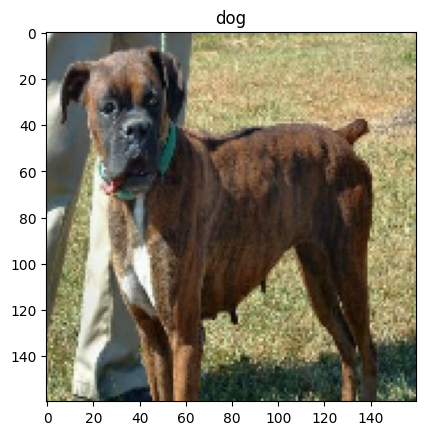

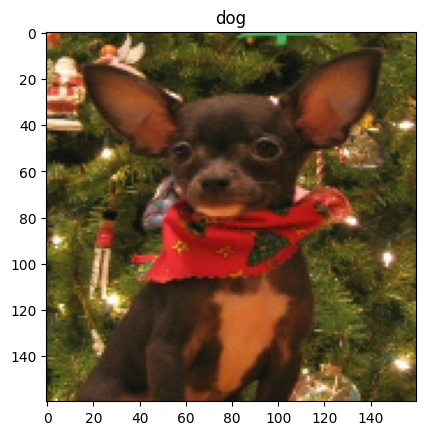

In [ ]:
# Let's see after the resizing how the images look from `train` (not raw x_train)
for image, label in train.take(2):
    plt.figure()
    plt.imshow((image + 1) / 2)   # shift back from [-1,1] → [0,1] so matplotlib shows correctly
    plt.title(get_label_name(label))

# Observations:
#Size is now fixed at 160x160 (resized).
#from [0,255] → [-1,1]. Matplotlib expects [0,1], so negatives show up as black.


Now the size and format of every image is same and float32

##Picking a Pretrained Model
Pretrained Model=Mobilenet V2 by google
This have over a million pictures on 1000 classes

In [ ]:
#IMG_SHAPE = (160, 160, 3)  # example, you should match this with your preprocessing

#Making the input layer for dnn
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(160,160,3),
    include_top=False, # don't include the loutput layer of ImageNet coz that what we want
    weights='imagenet' #This is the pre-trained weight
)

#Now we have to freeze the training  meaning the weights won't be changing during the training coz we already habe it pre-trained
base_model.trainable = False  # freeze the base so only your new head trains


###Model

In [ ]:
from tensorflow.keras import layers, models

#Ass theres only 2 class to predict one either cat or dog
#We  will add the output Dense layer in 1

#Creating Model
model=models.Sequential([ base_model,
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(1)
                        ])

###Compile

In [ ]:
#compiling
from tensorflow.keras import losses,optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), #This way coz i want t use the class of optimizer as learnig rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

###Fitting/training

In [ ]:
#As the  cats vs dogs set is trained and alreaduy have x_train with labels in batches
train_batches = train.shuffle(1000).batch(64)
validation_batches = validation.batch(64)
test_batches = test.batch(64)

model.fit(train_batches, epochs=10, validation_data=validation_batches, verbose=1)


Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 50s 143ms/step - accuracy: 0.5503 - loss: 4.2386 - val_accuracy: 0.7623 - val_loss: 1.8297
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 66s 102ms/step - accuracy: 0.8022 - loss: 1.5031 - val_accuracy: 0.8439 - val_loss: 1.3163
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.8713 - loss: 0.9563 - val_accuracy: 0.8770 - val_loss: 0.9773
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.8983 - loss: 0.7029 - val_accuracy: 0.8990 - val_loss: 0.8540
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 33s 110ms/step - accuracy: 0.9151 - loss: 0.6247 - val_accuracy: 0.9110 - val_loss: 0.7322
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.9281 - loss: 0.5272 - val_accuracy: 0.9162 - val_loss: 0.6411
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.9361 - loss: 0.4721 - val_accuracy: 0.9200 - val_loss: 0.7378
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.9340 - loss: 0

###Evaluate

In [ ]:
#Evaluate
loss,accuracy=model.evaluate(test_batches,verbose=2)
print(f'{accuracy:.03f}')

37/37 - 3s - 87ms/step - accuracy: 0.9454 - loss: 0.3833
0.945


###Saving

In [ ]:
#Saving
model.save('dogs_vs_cats.keras')

###Summary
Used pretrained MobileNetV2 as base model (weights="imagenet", include_top=False).

1. Resized input images to 160×160×3, normalized them.

2. Built model with:

3. BaseModel (MobileNetV2)

4. GlobalAveragePooling2D

5. Dense output layer (binary classification).

6. Used batch datasets (train, validation, test).

7. Compiled + trained with Adam optimizer.

8. Achieved ~94% accuracy.

9. Saved as dogs_vs_cats.keras.

---
## Navigation

[![Module 2](https://img.shields.io/badge/Prev-Module_02-e6770b?style=for-the-badge&logo=github&logoColor=00FF80&labelColor=765898)](https://github.com/aypy01/tensorflow/blob/main/module-2.ipynb)&nbsp;&nbsp;&nbsp;
[![Module 04](https://img.shields.io/badge/Next-Module_04-e6770b?style=for-the-badge&logo=github&logoColor=00FF80&labelColor=765898)](https://github.com/aypy01/tensorflow/blob/main/module-4.ipynb)


---

## Author
 <p align="left">
  Created and maintained by &nbsp;
  <a href="https://github.com/aypy01" target="_blank">
  <img src="https://img.shields.io/badge/Aaditya_Yadav-aypy01-e6770b?style=flat-square&logo=github&logoColor=00FF80&labelColor=765898" alt="GitHub Badge"/>
</a>

</p>

<p>
<img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&background=765898&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>



## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).
